In [20]:
import pandas as pd

In [21]:
df = pd.read_html('https://q-weather.info/weather/50953/history/?date=2023-05-21')[0]
df.head()

,时次,瞬时温度,地面气压,相对湿度,瞬时风向,瞬时风速,1小时极大风速,1小时降水,10分钟平均能见度
0,2023-05-21 01:00 +0800,8.5,987.2,89,253/WSW,2.8,3.0,0.0,5.484
1,2023-05-21 02:00 +0800,9.9,988.1,79,321/NW,2.7,8.8,0.0,5.500
2,2023-05-21 03:00 +0800,9.7,988.5,79,287/WNW,2.7,4.5,0.0,5.461
3,2023-05-21 04:00 +0800,8.7,989.0,87,301/WNW,2.3,3.6,0.0,5.229
4,2023-05-21 05:00 +0800,8.9,989.7,87,259/W,3.2,4.8,0.0,5.871


In [22]:
from tqdm import tqdm
import os

for date in tqdm(pd.date_range(start='2023-01-01', end='2023-05-21').format()):
    df = pd.read_html(f'https://q-weather.info/weather/50953/history/?date={date}')[0]
    if not os.path.exists('weather'):
        os.mkdir('weather')
    df.to_csv(f'weather/weather_{date}.csv', index=False)

 13%|█▎        | 19/141 [00:13<01:25,  1.42it/s]


KeyboardInterrupt: 

In [23]:
df = pd.read_html(r'https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E5%9C%B0%E7%BA%A7%E8%A1%8C%E6%94%BF%E5%8C%BA%E5%88%97%E8%A1%A8')[2]
df['区划名称'].values

array(['石家庄市', '唐山市', '秦皇岛市', '邯郸市', '邢台市', '保定市', '张家口市', '承德市', '沧州市',
       '廊坊市', '衡水市', '太原市', '大同市', '阳泉市', '长治市', '晋城市', '朔州市', '晋中市',
       '运城市', '忻州市', '临汾市', '吕梁市', '呼和浩特市', '包头市', '乌海市', '赤峰市', '通辽市',
       '鄂尔多斯市', '呼伦贝尔市', '巴彦淖尔市', '乌兰察布市', '兴安盟', '锡林郭勒盟', '阿拉善盟', '沈阳市',
       '大连市', '鞍山市', '抚顺市', '本溪市', '丹东市', '锦州市', '营口市', '阜新市', '辽阳市',
       '盘锦市', '铁岭市', '朝阳市', '葫芦岛市', '长春市', '吉林市', '四平市', '辽源市', '通化市',
       '白山市', '松原市', '白城市', '延边朝鲜族自治州', '哈尔滨市', '齐齐哈尔市', '鸡西市', '鹤岗市',
       '双鸭山市', '大庆市', '伊春市', '佳木斯市', '七台河市', '牡丹江市', '黑河市', '绥化市',
       '大兴安岭地区', '南京市', '无锡市', '徐州市', '常州市', '苏州市', '南通市', '连云港市', '淮安市',
       '盐城市', '扬州市', '镇江市', '泰州市', '宿迁市', '杭州市', '宁波市', '温州市', '嘉兴市',
       '湖州市', '绍兴市', '金华市', '衢州市', '舟山市', '台州市', '丽水市', '合肥市', '芜湖市',
       '蚌埠市', '淮南市', '马鞍山市', '淮北市', '铜陵市', '安庆市', '黄山市', '滁州市', '阜阳市',
       '宿州市', '六安市', '亳州市', '池州市', '宣城市', '福州市', '厦门市', '莆田市', '三明市',
       '泉州市', '漳州市', '南平市', '龙岩市', '宁德市', '南昌市', '景德镇市', '萍乡市', '九江市',
      

## requests

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://q-weather.info/weather/50953/history/?date=2023-01-01'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
table = soup.table
columns = [item.text for item in table.thead.tr.find_all('th')]

rows = []
for tr in table.tbody.find_all('tr'):
    rows.append([item.text for item in tr.find_all('td')])

df = pd.DataFrame(rows, columns=columns)
df.head()

,时次,瞬时温度,地面气压,相对湿度,瞬时风向,瞬时风速,1小时极大风速,1小时降水,10分钟平均能见度,积雪深度
0,2023-01-01 01:00 +0800,-15.8,1010.3,64,262/W,3.0,4.6,0.0,21.1,
1,2023-01-01 02:00 +0800,-16.0,1010.7,62,259/W,3.0,4.8,0.0,28.1,
2,2023-01-01 03:00 +0800,-16.2,1010.8,61,278/W,3.0,6.2,0.0,30.0,
3,2023-01-01 04:00 +0800,-17.4,1011.0,63,250/WSW,3.3,5.1,0.0,30.0,
4,2023-01-01 05:00 +0800,-17.6,1011.2,64,267/W,3.5,4.9,0.0,30.0,


In [29]:
with open('test.html', 'r') as f:
    html = f.read()

soup = BeautifulSoup(html, 'html.parser')
soup.find_all('div', attrs={'class': 'head'})

[<div class="head row">
 <div class="cell">Un</div>
 <div class="cell">Deux</div>
 <div class="cell">Trois</div>
 </div>]

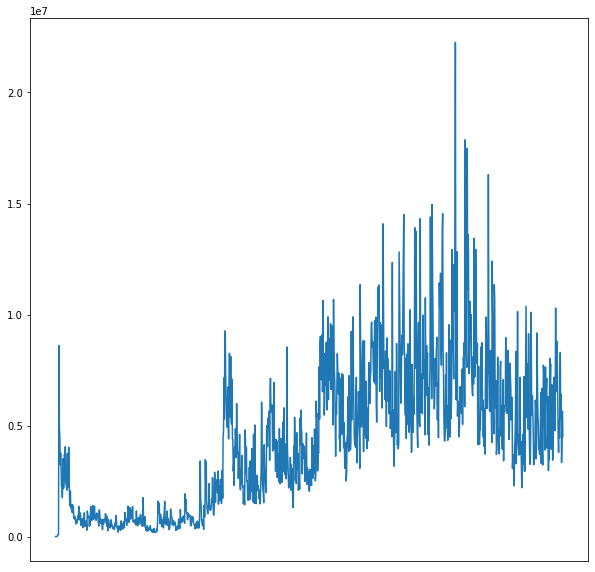

In [35]:
# 试试 tushare!
# 导入tushare
import tushare as ts
# 初始化pro接口
pro = ts.pro_api('5870741d9f27260e148b5c417adc744b6480541b442a86100eef4084')

# 拉取数据
df = pro.daily(**{
    "ts_code": "300750.SZ",
    "trade_date": "",
    "start_date": "",
    "end_date": "",
    "offset": "",
    "limit": ""
}, fields=[
    "ts_code",
    "trade_date",
    "open",
    "high",
    "low",
    "close",
    "pre_close",
    "change",
    "pct_chg",
    "vol",
    "amount"
])

x = df.trade_date.values; y = df.amount.values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(y[::-1])
plt.xticks([])
plt.show()

In [52]:
import requests
from bs4 import BeautifulSoup

keyword = '崩坏：星穹铁道'
url = 'http://www.baidu.com/s'
params = {
    'wd': keyword,
}
resp = requests.get(url, params=params)

soup = BeautifulSoup(resp.text, 'html.parser')
result_list = soup.find_all('div', attrs={'class': 'result'})
for result in result_list:
    print(result.h3.text.strip())
    print(result.find('span', attrs={'class': 'content-right_8Zs40'}).text)
    print(result.h3.a['href'])

崩坏:星穹铁道-哔哩哔哩频道
海量崩坏:星穹铁道视频,尽在哔哩哔哩崩坏:星穹铁道频道;bilibili是国内知名的视频弹幕网站,这里有最及时的动漫新番,最棒的ACG氛围,最有创意的Up主。大家可以在这里找到许多欢...
http://www.baidu.com/link?url=IenRm-9HADXEZGHGmEopDWOCeIPe3CbUY3-SOuPFtRsu0W83wKFDmjN9of3z_qAdPUkiWtm_nNDp9uPji_-NIzArIXvr5p2LzxOMSb-YzLm
崩坏星穹铁道:最全入坑开荒攻略!少走歪路避免痛苦号,这份...
4.部分支线(如狐仙和克拉拉的角色任务)的后续内容会根据你的选择而变得不同,所以拿不定主意的话可以问问万能的群友或者直接搜索一下相关攻略。 5.虽说铁道地图上的宝箱不多,前期也算...
http://www.baidu.com/link?url=IenRm-9HADXEZGHGmEopDWOCeIPe3CbUY3-SOuPFtRsu0W83wKFDmjN9of3z_qAdAIDhwomxtFDZNIM8DfRAkK
崩坏星穹铁道体验,用原神模式打开回合制,米哈游能否再创奇...
而在剧情方面，明显感觉崩坏星穹铁道要比原神开局好了很多，而且感觉更加“成人”了一些，比如给了主角非常多非常屑的选项，清风就喜欢选这些屑屑的选项，不过大部分过剧情的时候主...
http://www.baidu.com/link?url=G5321XHCMuCT47RUesLh8KD92obV5Mv0zkKu1tboLK4pBwIyI15jj3Qr8eaYZeLJGDNzyELZVdW53eYHATEk699QZeW1dv-vwI28BxV2RM3
崩坏星穹铁道“大量新角色”首爆!XP拉满,提前做好抽卡规划!
桂乃芬 4星火虚无，不是仙舟人，之前就整过很多活，例如徒手接子弹、倒立吃面条、刷牙吹口哨、在宣传图中还与素裳二人表演胸口碎大石，铁道素裳胸没崩三大的原因找到了，不过桂乃芬...
http://www.baidu.com/link?url=G5321XHCMuCT47RUesLh8KD92obV5Mv0zkKu1tboLK4pBwIyI15jj3Qr8eaYZeLJdV6DgTaqfTinVYCQuco2YWsYnSy4RtD44Ffxq2